Вариант 6<br>

Задание 4. Задача максимизации прибыли производителя

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.optimize import minimize, LinearConstraint, Bounds
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [29]:
A = 38
a1 = 0.5
a2 = 0.25
w1 = 5
w2 = 4
I = 180


xs, ys = sym.symbols('x y')
Q = A * xs ** a1 * ys ** a2 - w1 * xs - w2 * ys

def con(xy):
    x, y = xy
    return f'w1*x + w2*y = {(w1*x + w2*y).round(3)} <= I = {I}'

def f(xy):
    x, y = xy
    return -(A * x ** a1 * y ** a2 - w1 * x - w2 * y)

def gr(xy):
    x, y = xy
    
    der = np.zeros_like(xy)
    der[0] = -eval(str(Q.diff(xs)))
    der[1] = -eval(str(Q.diff(ys)))
    
    return der

print('dQ/dx:')
display(Q.diff(xs))
print('dQ/dy:')
display(Q.diff(ys))

x0 = np.array([1.0, 1.0])
res_without_constr = minimize(f, x0, jac=gr, options={'disp': True})

print(f'Оптимальные значения: x = {res_without_constr.x[0]}, y = {res_without_constr.x[1]}')
print('Max значение функции:',-res_without_constr.fun)

x_min = 0
y_min = 0
x_max = np.inf
y_max = np.inf

linear_constraint = LinearConstraint ([w1, w2], 0, I)
bounds = Bounds([x_min, y_min], [x_max, y_max])
x0 = np.array([1.0, 1.0])

res = minimize(f, x0, jac=gr, constraints=linear_constraint, bounds=bounds, options={'disp': True})

u = res.x[0]
v = res.x[1]

print(res.x)

print(f'Оптимальные значения: x = {u}, y = {v}')
print('Max значение функции:',-res.fun)
print(con(res.x))

dQ/dx:


19.0*y**0.25/x**0.5 - 5

dQ/dy:


9.5*x**0.5/y**0.75 - 4

Optimization terminated successfully.
         Current function value: -325.802500
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Оптимальные значения: x = 130.3212639087631, y = 81.450735671145
Max значение функции: 325.8024999995546
Optimization terminated successfully    (Exit mode 0)
            Current function value: -186.36335890215577
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7
[23.99946488 15.0006689 ]
Оптимальные значения: x = 23.999464877754345, y = 15.000668902804474
Max значение функции: 186.36335890215577
w1*x + w2*y = 180.0 <= I = 180


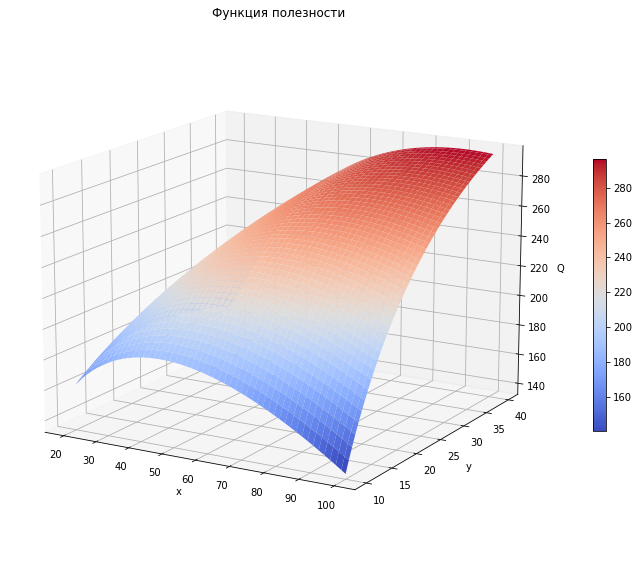

In [30]:
# Настраиваем 3D график
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

ax.view_init(15, -60)

X = np.linspace(20, 100, 200)
Y = np.linspace(10, 40, 100)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('Функция полезности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Q')
plt.show()

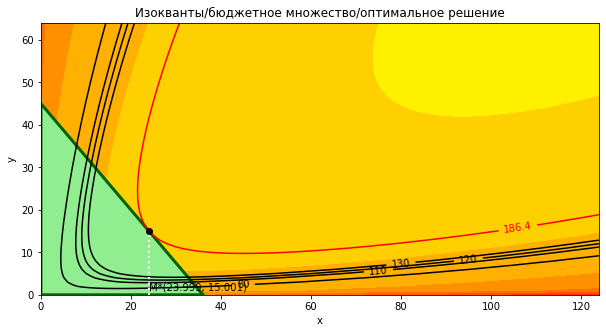

In [31]:
fig, ax = plt.subplots(figsize=(10,5))

X = np.arange(0, 125, 1)
Y = np.arange(0, 65, 1)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

ax.contourf(X, Y, Z, cmap='autumn')

adm = plt.Polygon([(x_min,y_min),(x_min, I/w2-w1*x_min/w2),(I/w1-w2*y_min/w1, y_min)], facecolor='lightgreen', edgecolor='darkgreen', alpha = 1, linewidth=3)
ax.add_patch(adm)

ax.set_title('Изокванты/бюджетное множество/оптимальное решение')
ax.set_xlabel('x')
ax.set_ylabel('y')

cs_m = ax.contour(X, Y, Z, levels=[-res.fun], colors='red')
cs = ax.contour(X, Y, Z, levels=[80,110,120,130], colors='black')

plt.vlines(x=u, ymin=0, ymax=v, colors='white', ls=':', lw=2)
ax.plot(u, v, 'ko')
ax.text(res.x[0], 1, f'M*({u.round(3)}, {v.round(3)})')

ax.clabel(cs)
ax.clabel(cs_m)

plt.show()

In [32]:
F = sym.Eq(Q, -res.fun)

print('Уравнение изокванты на которой достигается максимум прибыли при наличии ограничений на издержки:')
display(F)

print('Уравнение изокосты, которая соответствует ограничениям на издержки:')
display(sym.Eq(w1*xs + w2*ys, I))

Уравнение изокванты на которой достигается максимум прибыли при наличии ограничений на издержки:


Eq(38*x**0.5*y**0.25 - 5*x - 4*y, 186.363358902156)

Уравнение изокосты, которая соответствует ограничениям на издержки:


Eq(5*x + 4*y, 180)